In [208]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [209]:
#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

In [210]:
# Import lead data
leads= pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [211]:
leads.shape

(9240, 37)

In [212]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [213]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#Here, we can see the presence of few categorical values for which we have to create dummy variables. 
#Also, presence of null values can be observed thus, we have to treat them accordingly in further steps

# EDA

In [214]:
#Data understanding and data cleaning

#Identifying missing values

In [215]:
#check for duplicates

sum(leads.duplicated(subset = 'Prospect ID')) == 0
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

No duplicate values found in Prospect ID & Lead Number

Prospect ID & Lead Number are two variables that are just indicative of the ID number of the approched People so can be dropped.


In [216]:
#dropping Lead Number and Prospect ID since they have all unique values

leads.drop(columns =['Prospect ID', 'Lead Number'], inplace = True)


In [217]:
#Converting 'Select' values to NaN.

leads = leads.replace('Select', np.nan)

In [218]:
#checking null values in each rows

leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [219]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

As we can see there are many columns with high percentage of null values, we will drop them as they are not useful

Dropping columns with missing values

In [220]:
#Drop all the columns with more than 45% missing values
cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 35):
        leads.drop(i, axis=1, inplace = True)

In [221]:
#checking null values percentage

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [222]:
leads.shape

(9240, 25)

Categorical Attributes Analysis: 

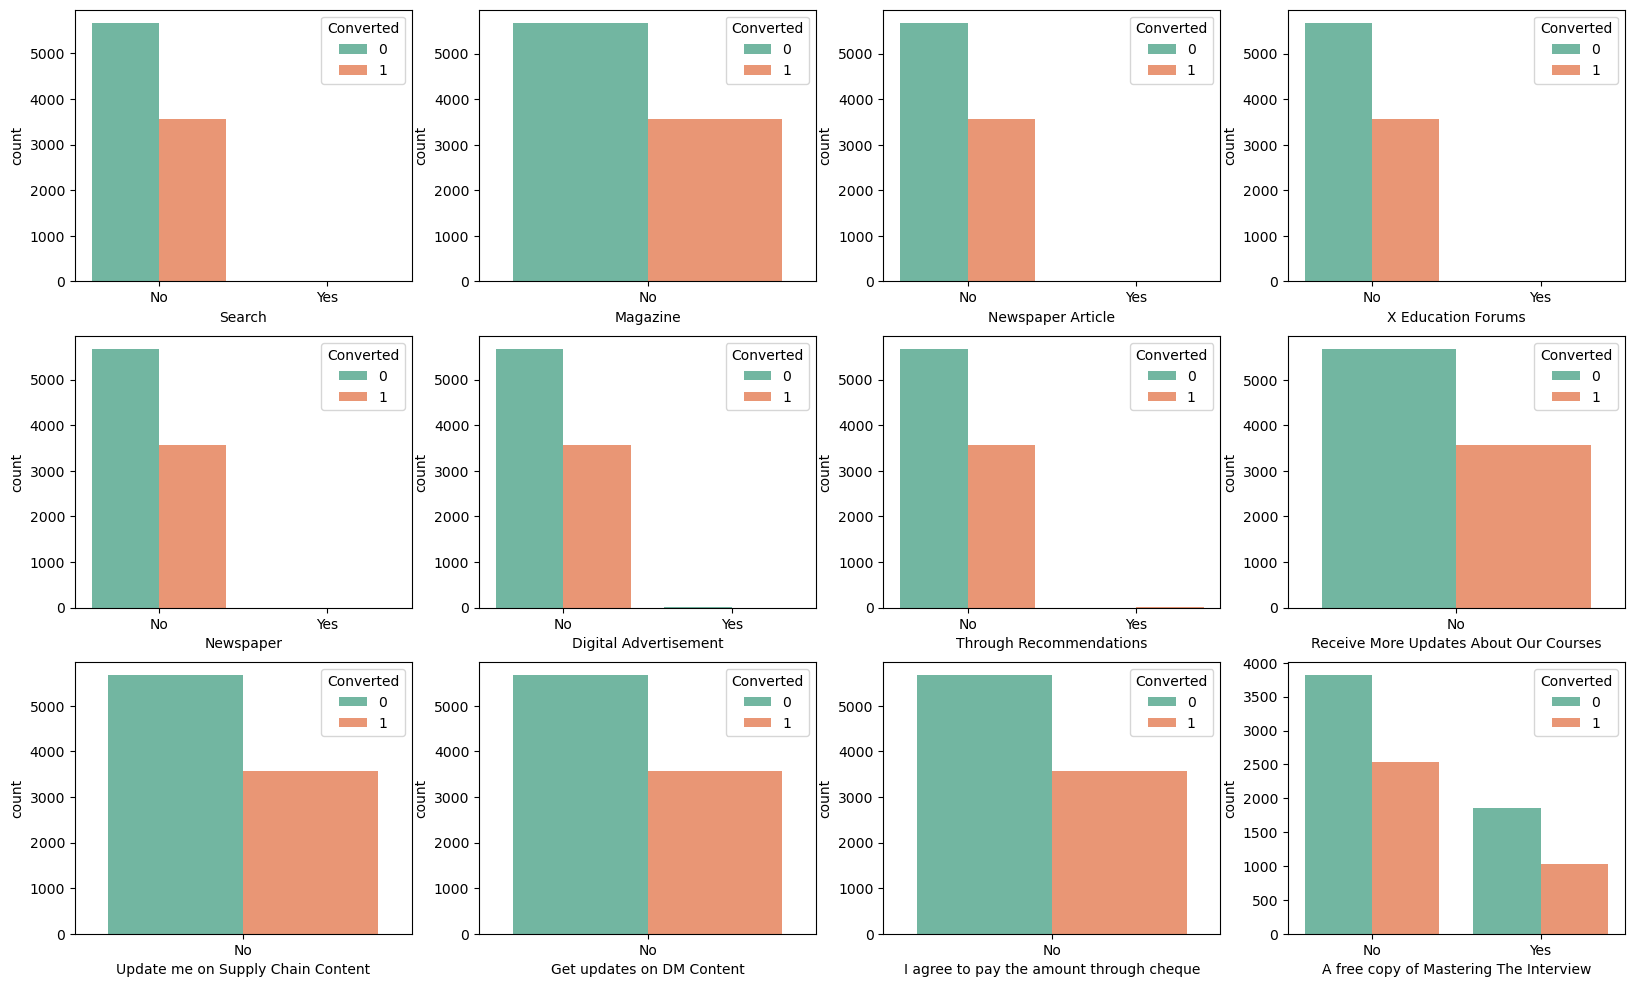

In [223]:
# Visualzing  variables for imbalancing
fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = leads, ax = axs[0,0],palette = 'Set2')
sns.countplot(x = "Magazine", hue = "Converted", data = leads, ax = axs[0,1],palette = 'Set2')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads, ax = axs[0,2],palette = 'Set2')
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads, ax = axs[0,3],palette = 'Set2')
sns.countplot(x = "Newspaper", hue = "Converted", data = leads, ax = axs[1,0],palette = 'Set2')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads, ax = axs[1,1],palette = 'Set2')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads, ax = axs[1,2],palette = 'Set2')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads, ax = axs[1,3],palette = 'Set2')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =leads, ax = axs[2,0],palette = 'Set2')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads, ax = axs[2,1],palette = 'Set2')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads, ax = axs[2,2],palette = 'Set2')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads, ax = axs[2,3],palette = 'Set2')
plt.show()

 Inference:
For all these columns except 'A free copy of Mastering The Interview' data is highly imbalanced, thus we will drop them
 "A free copy of Mastering The Interview" is a redundant variable so we will include this also in list of dropping columns.

In [224]:
#creating a list of columns to be dropped

cols_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper', 'Digital Advertisement',
               'Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
               'A free copy of Mastering The Interview'])

Lead Source

In [225]:
#checking value counts of Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

Google is having highest number of occurences, hence we will impute the missing values with label 'Google'

In [226]:
#replacing Nan Value with Google
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')


In [227]:
#combining low frequency values to Others

leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

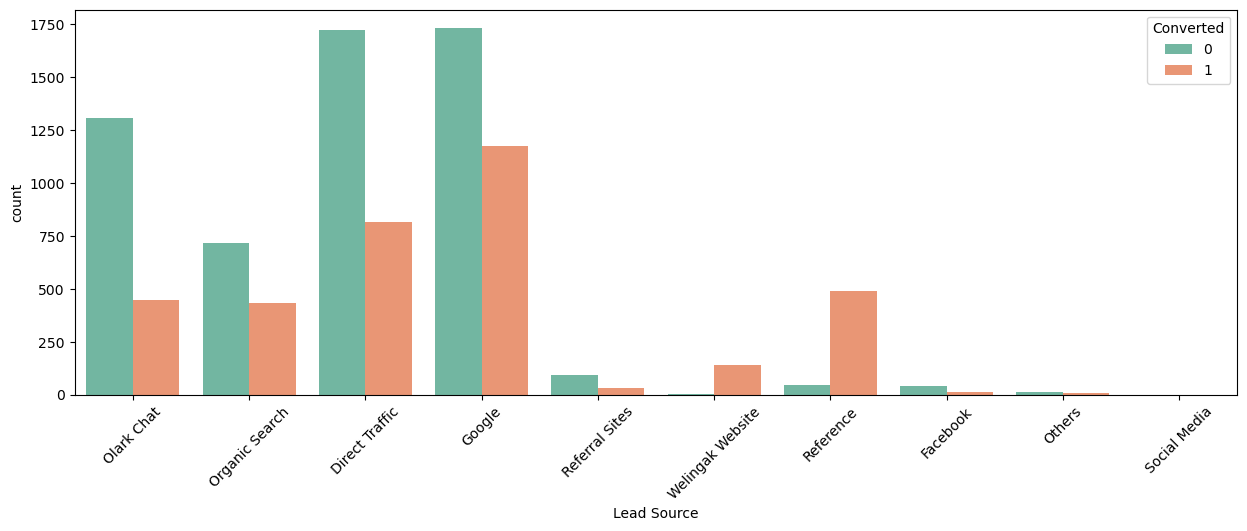

In [228]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =leads , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

 Inference
    Maximum Leads are generated by Google and Direct Traffic.
    Conversion rate of Reference leads and Welinkgak Website leads is very high.



 Country


In [229]:
#checking value counts of Country column

leads['Country'].value_counts(dropna=False)


Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

Since, missing values are very high , we can impute all missing values with value 'not provided'

In [230]:
#Imputing missing values in Country column with "'not provided"
leads['Country'] = leads['Country'].replace(np.nan,'not provided')

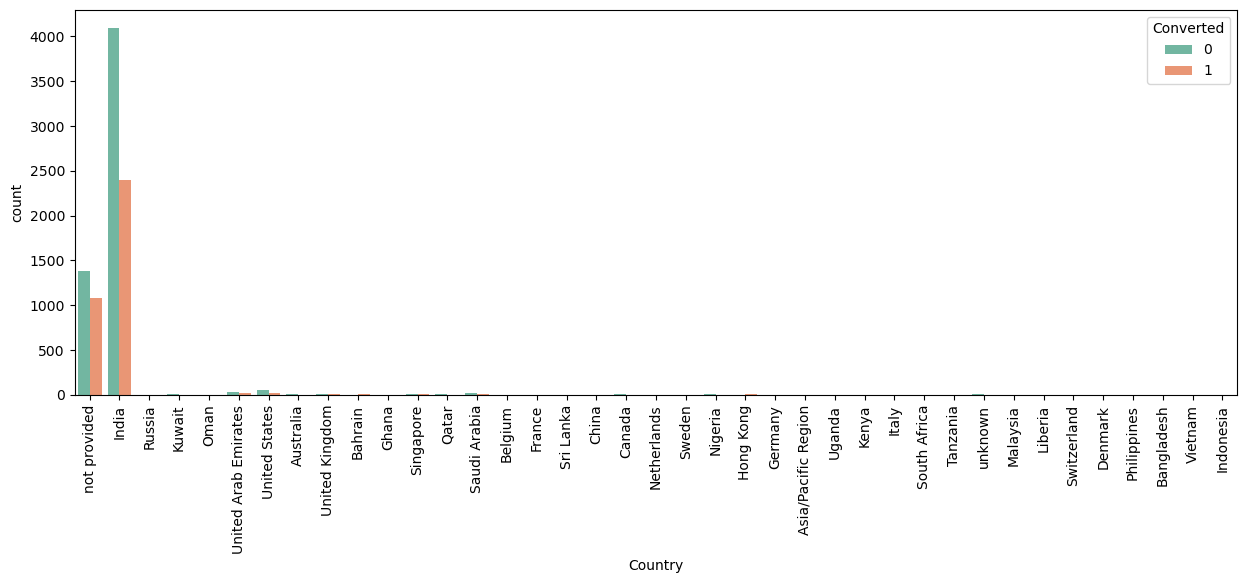

In [231]:
# Visualizing Country variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted' , data =leads , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

 Inference:
As we can see that most of the data consists of value 'India', no inference can be drawn from this parameter.
Hence, we can drop this column


In [232]:
#creating a list of columns to be droppped

cols_to_drop.append('Country')

#checking out list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country']

 What is your current occupation


In [233]:
#checking value counts of 'What is your current occupation' column
leads['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

Since no information has been provided regarding occupation, we can replace missing values with new category 'Not provided'

In [234]:
#Creating new category 'Not provided'

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Not provided')

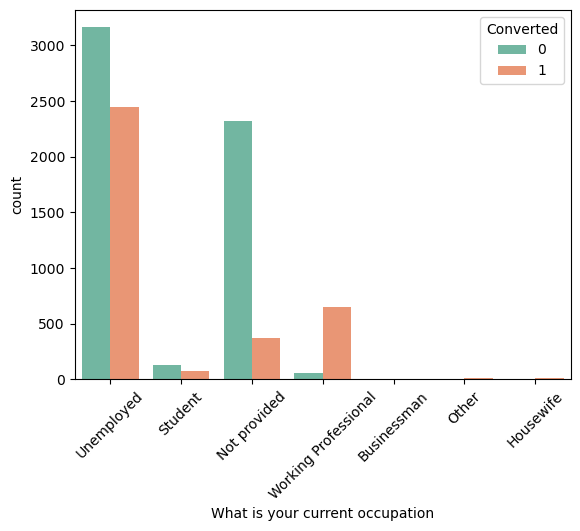

In [235]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = leads , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()


 Inference

    Maximum leads generated are unemployed and their conversion rate is more than 50%.
    Conversion rate of working professionals is very high.

What matters most to you in choosing a course

In [236]:
#checking value counts of 'What matters most to you in choosing a course'

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

Clearly seen that missing values in the this column can be imputed by 'Better Career Prospects'

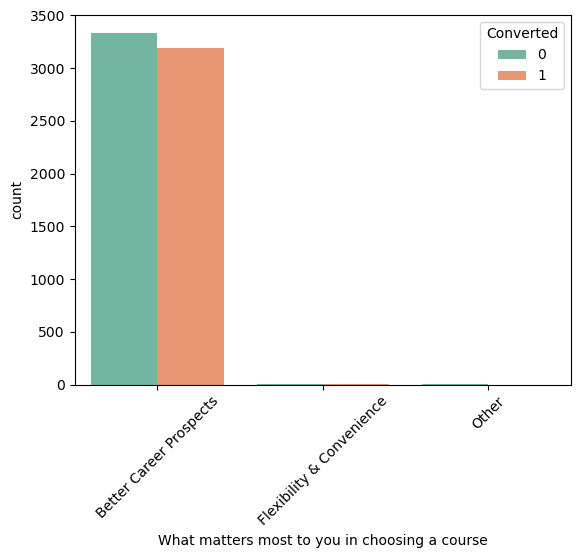

In [237]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = leads , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

Inference
This column spread of variance is very low , hence it can be dropped.

In [238]:
# Append 'What matters most to you in choosing a course'to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course']

Last Activity


In [239]:
#checking value counts of Last Activity
leads['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

Missing values can be imputed with mode value "Email Opened"

In [240]:
 #replacing Nan Values with mode value "Email Opened"

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Email Opened')


In [241]:
#combining low frequency values
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

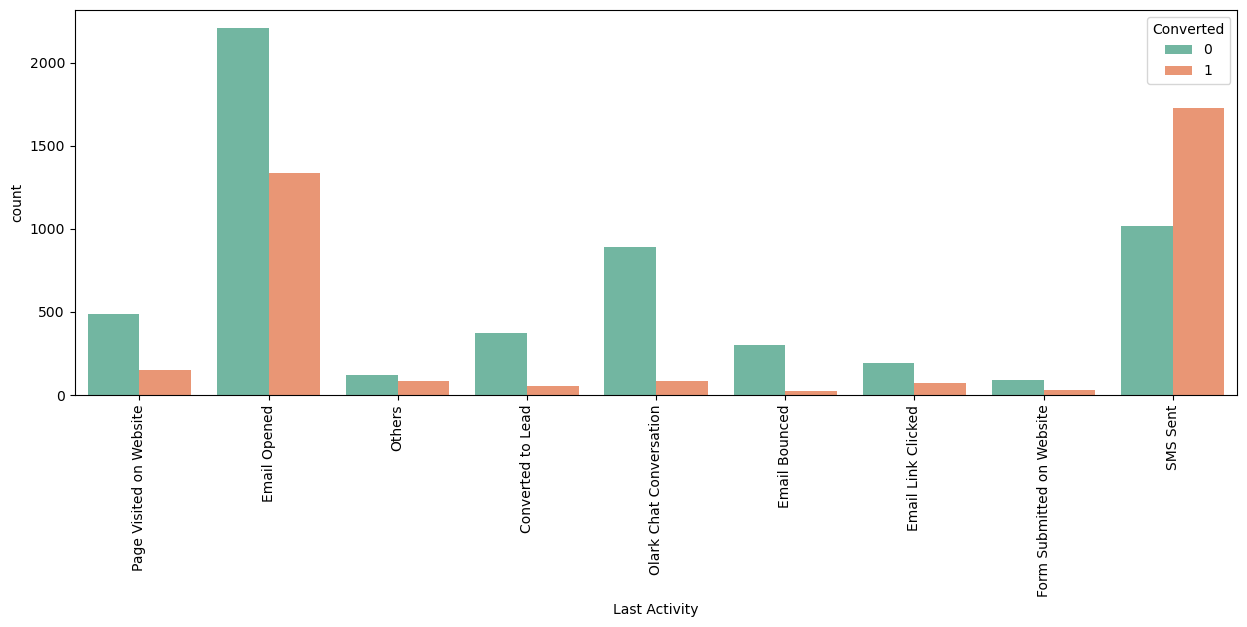

In [242]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = leads , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

 Inference

    Maximum leads are generated having last activity as Email opened but conversion rate is not too good.
    SMS sent as last acitivity has high conversion rate.

In [243]:
# Append 'Last Activity' to the cols_to_drop List it is a X-education's sales team generated data
cols_to_drop.append('Last Activity')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

In [244]:
#Check the Null Values in All Columns after imputation:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [245]:
# Remaining missing values percentage is less than 2%, we can drop those rows without affecting the data
leads = leads.dropna()

In [246]:
leads.shape

(6401, 25)

In [247]:
#Checking percentage of Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

Lead Origin

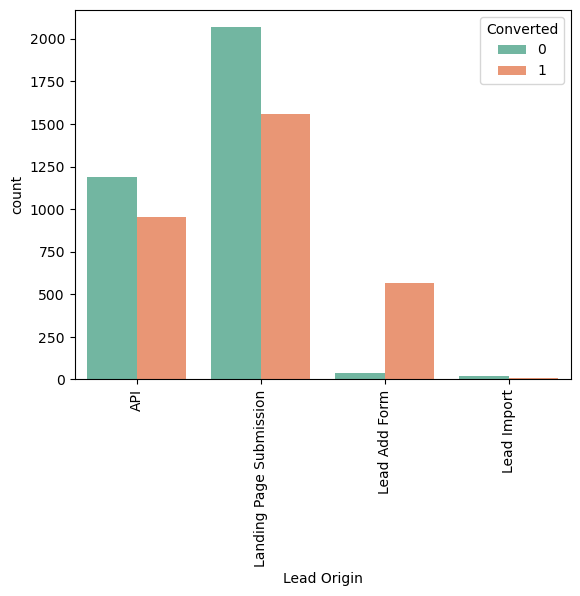

In [248]:
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = leads , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Do Not Email & Do Not Call

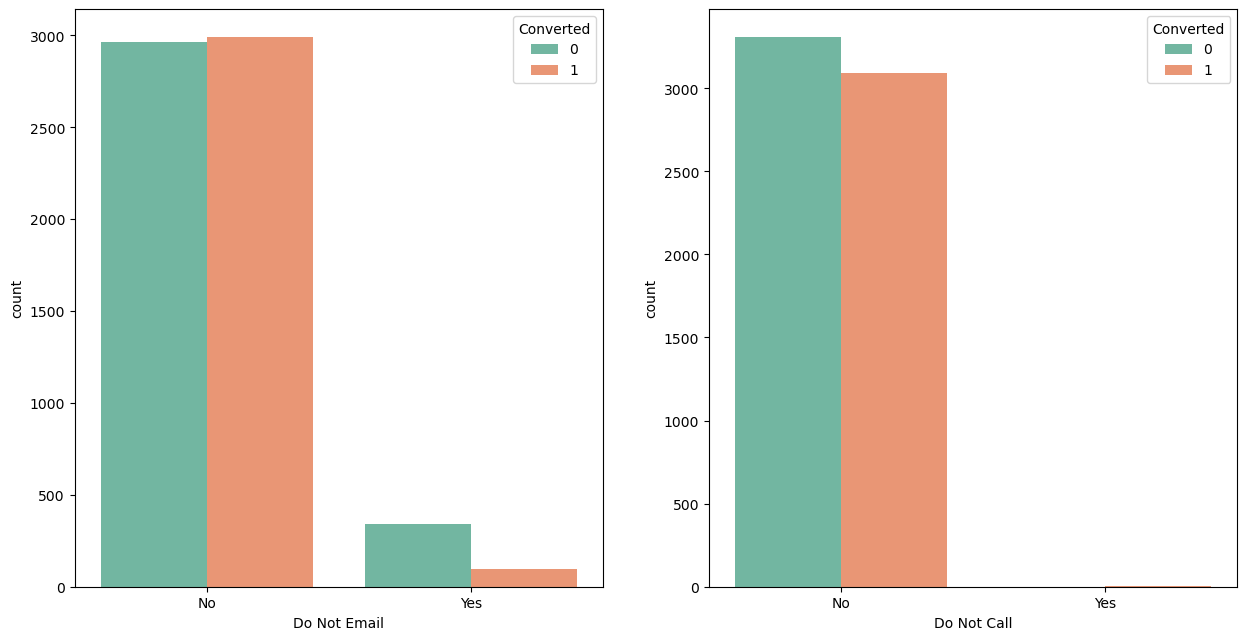

In [249]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads, ax = axs[0],palette = 'Set2')
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads, ax = axs[1],palette = 'Set2')
plt.show()

We Can append the Do Not Call Column to the list of Columns to be Dropped data is higjly skewed

In [250]:
# Append 'Do Not Call' to the cols_to_drop List
cols_to_drop.append('Do Not Call')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call']

Last Notable Activity

In [251]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Last Notable Activity
Email Opened                    2042
Modified                        1950
SMS Sent                        1889
Page Visited on Website          212
Email Link Clicked               110
Olark Chat Conversation           76
Email Bounced                     49
Unsubscribed                      33
Unreachable                       22
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: count, dtype: int64

In [252]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

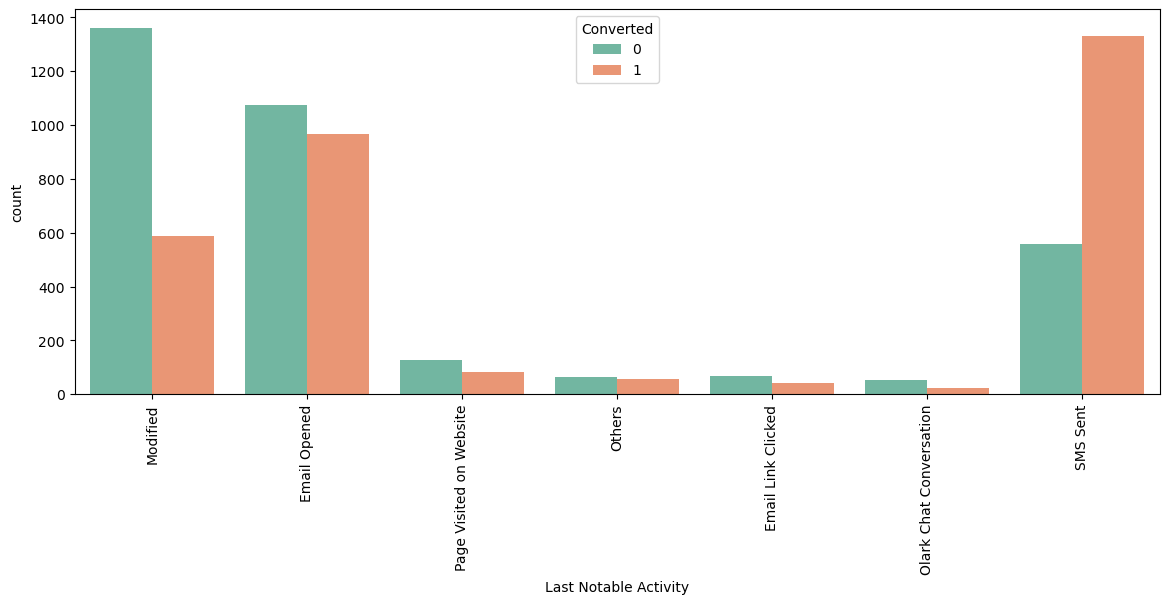

In [253]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads, palette = 'Set2')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

 Inference

    Maximum leads are generated having last activity as Email opened but conversion rate is not too good.
    SMS sent as last acitivity has high conversion rate.

In [254]:
# Append 'Last Notable Activity'to the cols_to_drop List as this is a sales team generated data
cols_to_drop.append('Last Notable Activity')

In [255]:
# checking final list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call',
 'Last Notable Activity']

In [256]:
#dropping columns
leads= leads.drop(cols_to_drop, axis=1)

In [257]:
#checking info of dataset for remaining columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6401 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      6401 non-null   object 
 1   Lead Source                      6401 non-null   object 
 2   Do Not Email                     6401 non-null   object 
 3   Converted                        6401 non-null   int64  
 4   TotalVisits                      6401 non-null   float64
 5   Total Time Spent on Website      6401 non-null   int64  
 6   Page Views Per Visit             6401 non-null   float64
 7   What is your current occupation  6401 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 450.1+ KB


In [258]:
#checking dataset
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed


Type Markdown and LaTeX: 𝛼2

3.4 Numerical Attributes Analysis:

Converted

In [259]:
# Finding out conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

48.28932979221997

Currently, lead Conversion rate is 48% only

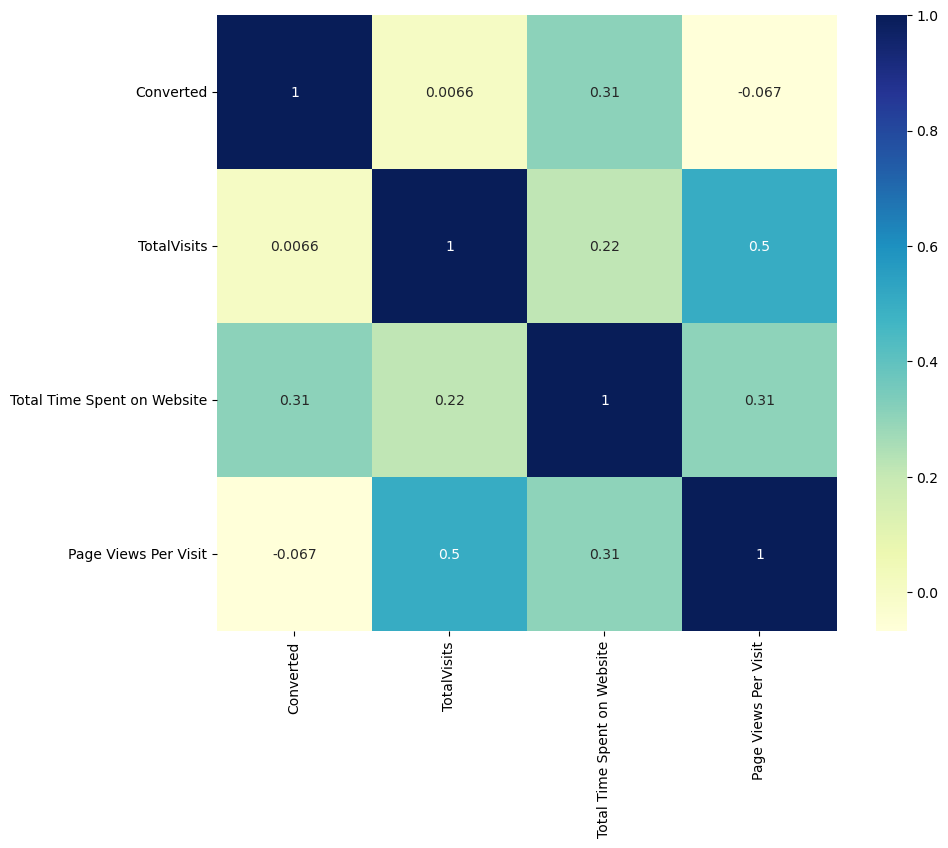

In [260]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
numeric_leads = leads.select_dtypes(include='number')
sns.heatmap(numeric_leads.corr(), cmap="YlGnBu", annot=True)
#sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

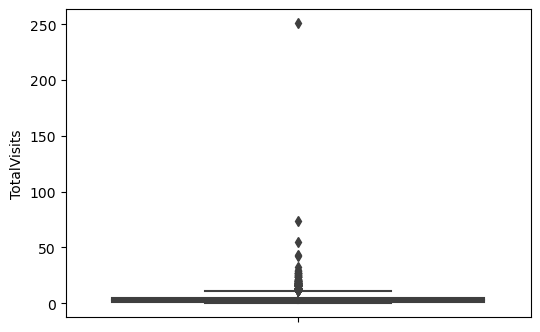

In [261]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

Presence of outliers can be seen clearly

In [262]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6401.000000
mean        3.590689
std         4.847158
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

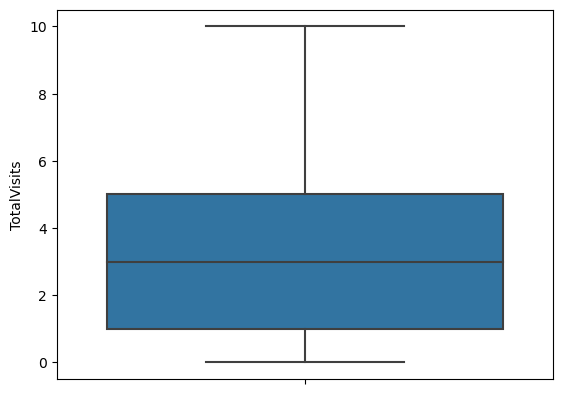

In [263]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'])
plt.show()

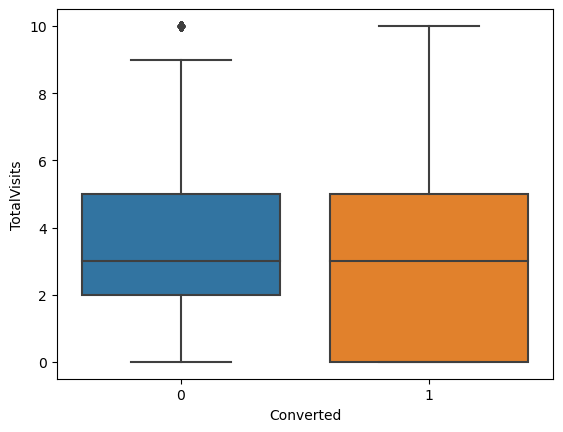

In [264]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

Inference
As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable TotalVisits

Total time spent on website

In [265]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6401.000000
mean      532.855491
std       565.262896
min         0.000000
5%          0.000000
25%        31.000000
50%       283.000000
75%      1020.000000
90%      1426.000000
95%      1591.000000
99%      1849.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

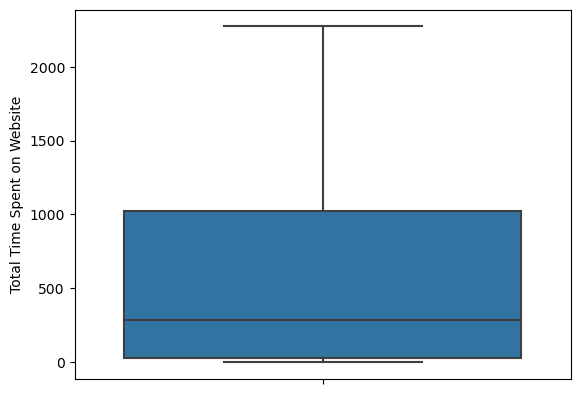

In [266]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leads['Total Time Spent on Website'])
plt.show()

Since there are no major outliers for the above variable, outlier treatment is not required for it

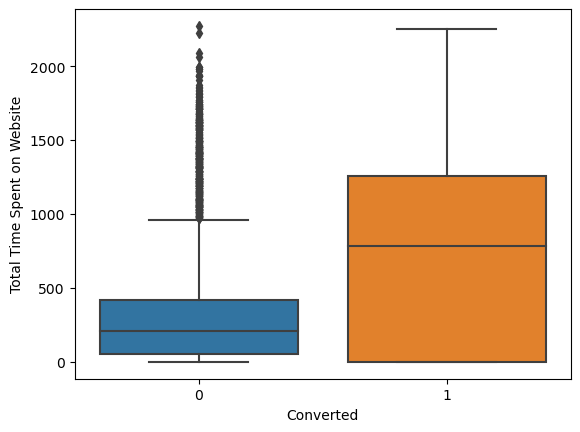

In [267]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

Inference
As can be seen, leads spending more time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate

Page views per visit

In [268]:
leads['Page Views Per Visit'].describe()

count    6401.000000
mean        2.468644
std         2.167626
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        55.000000
Name: Page Views Per Visit, dtype: float64

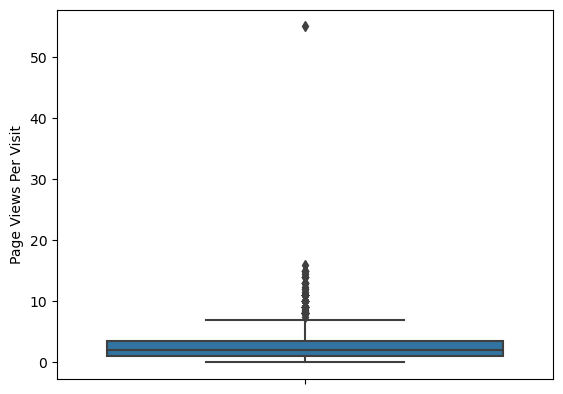

In [269]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =leads['Page Views Per Visit'])
plt.show()

Presence of outliers can be clearly seen in the above boxplot, thus outlier treatment need to be done for this variable

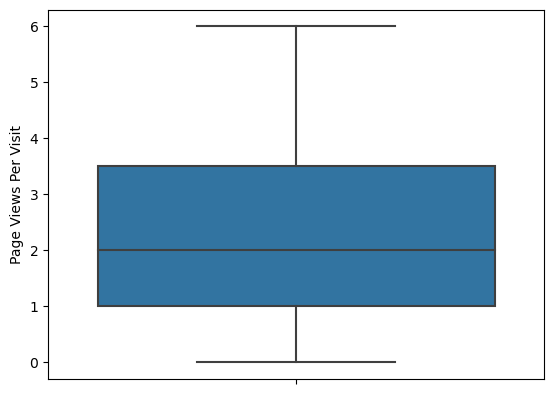

In [270]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

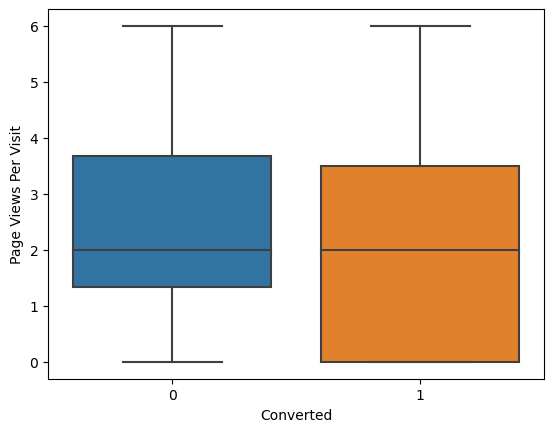

In [271]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

Inference

    Median for converted and not converted leads is almost same.
    Nothing conclusive can be said on the basis of Page Views Per Visit.

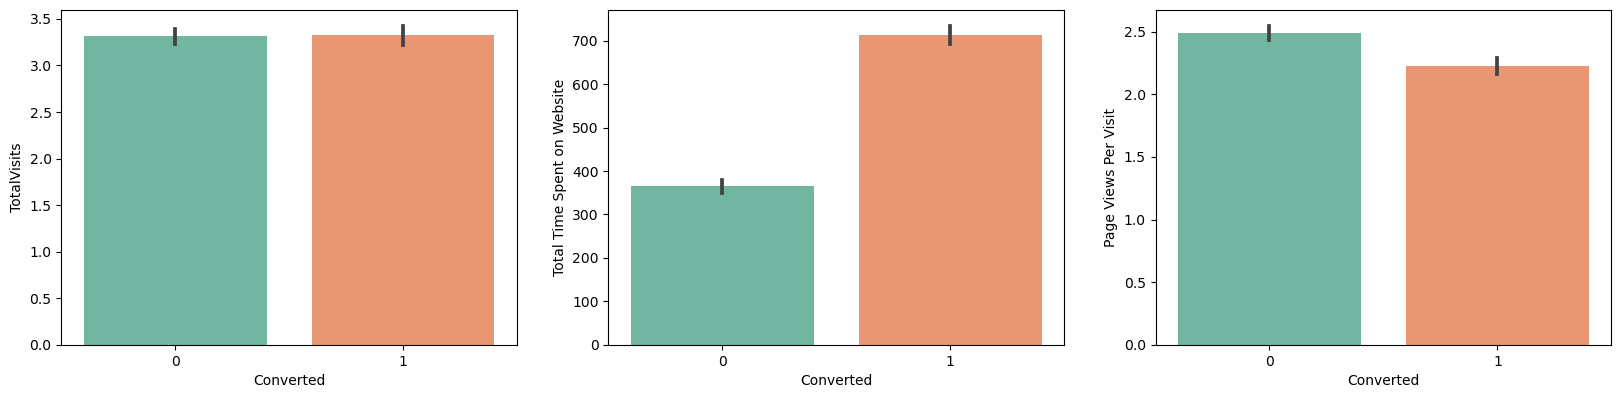

In [272]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leads)
plt.show()

Inference
The conversion rate is high for Total Visits, Total Time Spent on Website and Page Views Per Visit



Now, all data labels are in good shape , we will proceed to our next step which is Data Preparation

# Step 4: Data Preparation

Converting some binary variables (Yes/No) to 0/1

In [273]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [274]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed


In [275]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6401 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      6401 non-null   object 
 1   Lead Source                      6401 non-null   object 
 2   Do Not Email                     6401 non-null   int64  
 3   Converted                        6401 non-null   int64  
 4   TotalVisits                      6401 non-null   float64
 5   Total Time Spent on Website      6401 non-null   int64  
 6   Page Views Per Visit             6401 non-null   float64
 7   What is your current occupation  6401 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 450.1+ KB


In [276]:
#getting a list of categorical columns foy creating dummy

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [277]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source','What is your current occupation']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [278]:
# Dropping the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source','What is your current occupation'], axis=1)

In [279]:
# Let's take a look at the dataset again

leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,0,0,5.0,674,2.5,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,0,1,2.0,1532,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,0,0,1.0,305,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,0,1,2.0,1428,1.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False


Step 5: Test-Train Split

In [280]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [281]:
# Putting feature variable to X
X=leads.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,0,5.0,674,2.5,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,0,2.0,1532,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,0,1.0,305,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,0,2.0,1428,1.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False


In [282]:
# Putting response variable to y
y = leads['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [283]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [284]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4480, 21)
y_train Size (4480,)


# Step 6: Feature Scaling

In [285]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler


In [286]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
6099,-0.273127,2.350427,-0.809479,2.025517,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
5581,-0.273127,-1.192374,-0.940692,-1.320622,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1329,-0.273127,0.933307,0.456548,2.025517,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
7102,-0.273127,0.933307,-0.181785,-0.205242,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
7326,-0.273127,-1.192374,-0.940692,-1.320622,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False


In [287]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

48.28932979221997

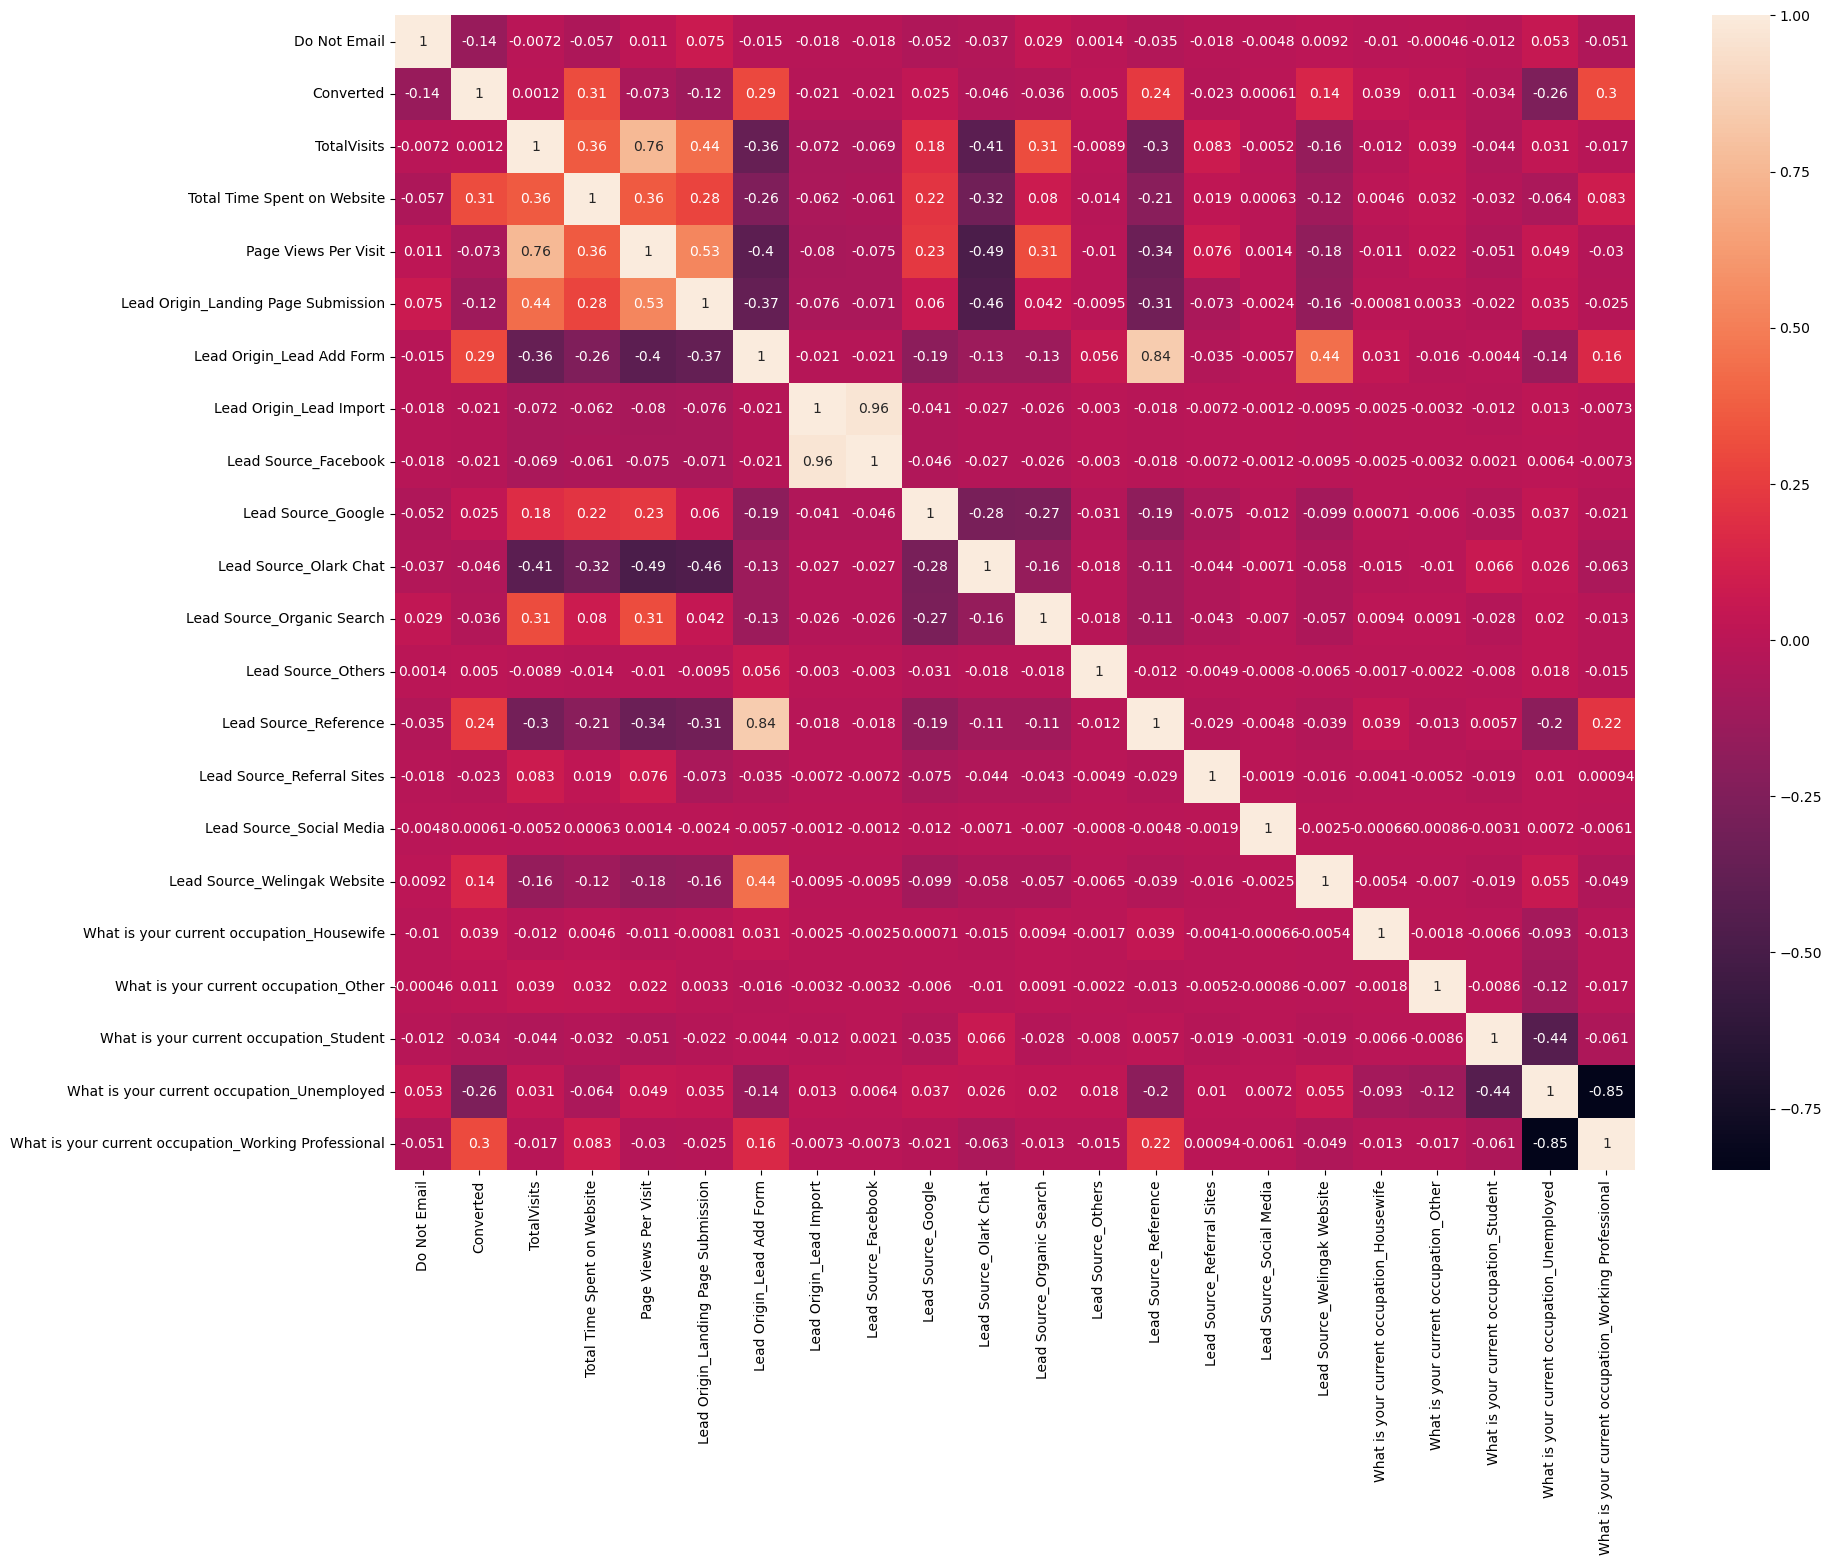

In [288]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()


Dropping highly correlated dummy variables

In [ ]:
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'], axis=1)

In [ ]:
X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],axis=1)

# Step 7: Model Building using Stats Model & RFE

In [289]:
# importing necessary library
import statsmodels.api as sm

In [290]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [291]:
rfe.support_

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True, False, False,  True,  True, False,
        True,  True,  True])

In [292]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Social Media', False, 5),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 6),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [322]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [323]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'What is your current occupation_Other'],
      dtype='object')

In [324]:
#BUILDING MODEL #1



X_train_sm = sm.add_constant(X_train[col])

X_train_sm = X_train_sm.astype(float)

y_train = y_train.astype(int)

logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4465
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2179.2
Date:                Mon, 29 Apr 2024   Deviance:                       4358.3
Time:                        17:29:25   Pearson chi2:                 4.74e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3376
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3237      0.602     -0.537      0.591      -1.504       0.857
Do Not Email                                            -0.2911      0.046     -6.363      0.000      -0.381      -0.201
TotalVisits                                              0.2686      0.047      5.709      0.000       0.176       0.361
Total Time Spent on Website                              1.1374      0.046     24.827      0.000       1.048       1.227
Lead Origin_Lead Add Form                                4.7847      0.762      6.280      0.000       3.291       6.278
Lead Origin_Lead Import                                  0.5737      0.302      1.902      0.057      -0.017       1.165
Lead Source_Facebook                                     0.5737      0.302      1.902      0.057      -0.017       1.165
Lead Source_Google                                       0.3850      0.086      4.482      0.000       0.217       0.553
Lead Source_Olark Chat                                   1.7865      0.137     13.086      0.000       1.519       2.054
Lead Source_Others                                       0.5734      0.841      0.682      0.495      -1.074       2.221
Lead Source_Reference                                   -0.5021      0.786     -0.639      0.523      -2.043       1.039
Lead Source_Welingak Website                             2.1970      1.260      1.744      0.081      -0.272       4.666
What is your current occupation_Housewife               21.4179   1.81e+04      0.001      0.999   -3.55e+04    3.55e+04
What is your current occupation_Student                 -0.8247      0.633     -1.303      0.192      -2.065       0.416
What is your current occupation_Unemployed              -0.7369      0.601     -1.225      0.220      -1.916       0.442
What is your current occupation_Working Professional     1.9450      0.628      3.095      0.002       0.713       3.177
========================================================================================================================
"""

In [325]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

p-value of variable What is your current occupation_Housewife is high, so we can drop it.

In [ ]:
#dropping column with high p-value

col = col.drop("What is your current occupation_Housewife" ,1)


In [327]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6099    0.219164
5581    0.357834
1329    0.447402
7102    0.281466
7326    0.860987
7288    0.890627
8504    0.881789
494     0.977977
1338    0.107317
8732    0.537958
dtype: float64

In [328]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21916398, 0.35783357, 0.44740228, 0.28146578, 0.86098657,
       0.89062693, 0.88178897, 0.97797697, 0.10731743, 0.53795833])

In [329]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.219164,6099
1,0,0.357834,5581
2,1,0.447402,1329
3,1,0.281466,7102
4,1,0.860987,7326


In [330]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.219164,6099,0
1,0,0.357834,5581,0
2,1,0.447402,1329,0
3,1,0.281466,7102,0
4,1,0.860987,7326,1


# Metrics -Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [331]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1954  373]
 [ 635 1518]]


In [332]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.775


In [333]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [334]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7050627032048304

In [335]:
# Let us calculate specificity
TN / float(TN+FP)

0.8397077782552643

In [336]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.1602922217447357


In [337]:
# positive predictive value 
print (TP / float(TP+FP))

0.8027498677948176


In [338]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7547315565855542


PLOTTING ROC CURVE

An ROC curve demonstrates several things:

    It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
    The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
    The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test

In [339]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [340]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

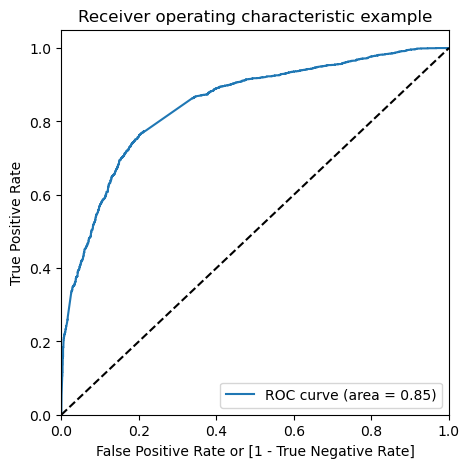

In [341]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.86 indicating a good predictive model.

Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity


In [342]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.219164,6099,0,1,1,1,0,0,0,0,0,0,0
1,0,0.357834,5581,0,1,1,1,1,0,0,0,0,0,0
2,1,0.447402,1329,0,1,1,1,1,1,0,0,0,0,0
3,1,0.281466,7102,0,1,1,1,0,0,0,0,0,0,0
4,1,0.860987,7326,1,1,1,1,1,1,1,1,1,1,0


In [343]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.480580  1.000000  0.000000
0.1   0.1  0.516295  0.999071  0.069618
0.2   0.2  0.650893  0.939155  0.384186
0.3   0.3  0.740848  0.887599  0.605071
0.4   0.4  0.780357  0.758941  0.800172
0.5   0.5  0.775000  0.705063  0.839708
0.6   0.6  0.758929  0.634928  0.873657
0.7   0.7  0.728348  0.528565  0.913193
0.8   0.8  0.689732  0.407803  0.950580
0.9   0.9  0.626786  0.235950  0.988397


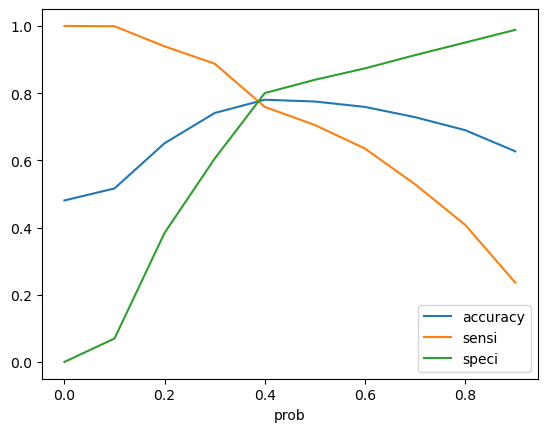

In [344]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [345]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.219164,6099,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.357834,5581,0,1,1,1,1,0,0,0,0,0,0,1
2,1,0.447402,1329,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.281466,7102,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.860987,7326,1,1,1,1,1,1,1,1,1,1,0,1


In [346]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.219164,6099,0,22
1,0,0.357834,5581,1,36
2,1,0.447402,1329,1,45
3,1,0.281466,7102,0,28
4,1,0.860987,7326,1,86


In [347]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

final_Predicted
1    1911
0     242
Name: count, dtype: int64

In [348]:
# check the precentage of final_predicted conversions

2005/float(2005+414)

0.8288548987184787

Hence, we can see that the final prediction of conversions have a target of 83% conversion as per the X Educations CEO's requirement . Hence, we can say that this is a good model.

Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [349]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7408482142857142

In [350]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[1408,  919],
       [ 242, 1911]], dtype=int64)

In [351]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [352]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.887598699489085

In [353]:
# Let us calculate specificity
TN / float(TN+FP)

0.6050709067468844

Inference:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.86, which is very good. We have the following values for the Train Data:

    Accuracy : 74.08%
    Sensitivity :88.75%
    Specificity : 60.50%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.


In [354]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.3949290932531156


In [355]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6752650176678445


In [356]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8533333333333334


# Precision and Recall

In [357]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[1408,  919],
       [ 242, 1911]], dtype=int64)

In [358]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6752650176678445

In [359]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.887598699489085

In [360]:
from sklearn.metrics import precision_score, recall_score

In [361]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6752650176678445

In [362]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.887598699489085

# Precision and Recall Trade-off


In [363]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [364]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

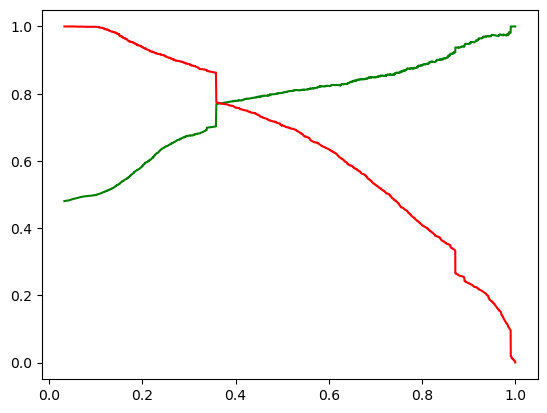

In [365]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Predictions on the test set

In [366]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
2413,-0.270526,-0.451915,-0.347307,-0.198289,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1567,-0.270526,-1.197090,-0.947568,-1.340647,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
4130,-0.270526,1.038435,0.898985,-0.198289,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
3842,-0.270526,-1.197090,-0.947568,-1.340647,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
6843,-0.270526,-0.079328,1.493965,0.372890,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [367]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Reference,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
2413,-0.270526,-0.451915,-0.347307,False,False,False,False,False,False,False,False,False,False,True,False
1567,-0.270526,-1.197090,-0.947568,True,False,False,False,False,False,True,False,False,False,False,True
4130,-0.270526,1.038435,0.898985,False,False,False,True,False,False,False,False,False,False,True,False
3842,-0.270526,-1.197090,-0.947568,False,False,False,False,True,False,False,False,False,False,True,False
6843,-0.270526,-0.079328,1.493965,False,False,False,False,False,False,False,False,False,False,True,False


In [373]:
X_test_sm = sm.add_constant(X_test)

In [374]:
X_test_sm.shape

(1921, 16)

In [ ]:
y_test_pred = res.predict(X_test_sm) 

In [ ]:
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})


In [ ]:
y_pred_final.head()

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

In [ ]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

In [ ]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

Precision and Recall metrics for the test set


In [ ]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

In [ ]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

Inference:
After running the model on the Test Data these are the figures we obtain:

    Accuracy : 77.52%
    Sensitivity :83.01%
    Specificity : 74.13%

Conclusion:

    While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
    Accuracy, Sensitivity and Specificity values of test set are around 77%, 83% and 74% which are approximately closer to the respective values calculated using trained set.
    Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
    Hence overall this model seems to be good.

Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
Lead Origin_Lead Add Form
What is your current occupation_Working Professional
Total Time Spent on Website 